Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


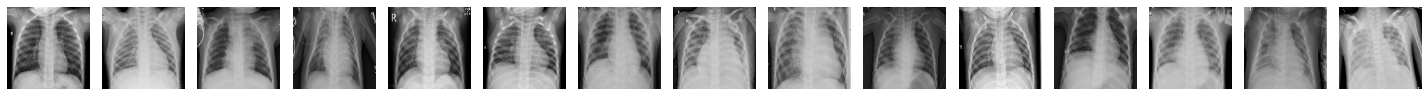

In [7]:
import numpy as np
from numpy.random import seed
from time import time
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, TensorBoard
from time import time, strftime, gmtime
import os
import tensorflow as tf

#set numpy and tensorflow seeds
seed(1337)
tf.random.set_seed(1337)

physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

PATH ='./'


batchSize = 32
imgSize = 128
train_data_gen = ImageDataGenerator().flow_from_directory(
    directory=os.path.join(PATH, 'train'),
    target_size=(imgSize, imgSize),
    class_mode='binary',
    batch_size=batchSize)

val_data_gen = ImageDataGenerator().flow_from_directory(
    directory=os.path.join(PATH, 'val'),
    target_size=(imgSize, imgSize),
    class_mode='binary',
    batch_size=batchSize)

test_data_gen = ImageDataGenerator().flow_from_directory(
    directory=os.path.join(PATH, 'test'),
    target_size=(imgSize, imgSize),
    class_mode='binary',
    batch_size=batchSize)

#plot images
imgs, labels = next(train_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1,15, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img.astype('uint8'))
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)

In [8]:
nn = Sequential()
# input shape = image shape + 3 colors on 3rd dimension
nn.add(Conv2D(32,3,padding='same', activation='relu',input_shape=(imgSize,imgSize,3)))
nn.add(MaxPool2D())
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Conv2D(64, 3, padding='same',activation='relu'))
nn.add(MaxPool2D())
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Conv2D(128, 3, padding='same',activation='relu'))
nn.add(MaxPool2D())
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Conv2D(256, 3, padding='same',activation='relu'))
nn.add(MaxPool2D())
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Flatten())
nn.add(Dense(128,activation='relu'))
nn.add(Dense(1,activation='sigmoid'))
nn.summary()
nn.compile(optimizer='rmsprop', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 64)       

### create and compile the convolutional neural network

In [9]:
nn = Sequential()
# input shape = image shape + 3 colors on 3rd dimension
nn.add(Conv2D(32,3,padding='same', activation='relu',input_shape=(imgSize,imgSize,3)))
nn.add(MaxPool2D())
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Conv2D(64, 3, padding='same',activation='relu'))
nn.add(MaxPool2D())
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Conv2D(128, 3, padding='same',activation='relu'))
nn.add(MaxPool2D())
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Conv2D(256, 3, padding='same',activation='relu'))
nn.add(MaxPool2D())
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Flatten())
nn.add(Dense(128,activation='relu'))
nn.add(Dense(1,activation='sigmoid'))
nn.summary()
nn.compile(optimizer='rmsprop', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 64)       

#### Train and Validate

In [ ]:
start_train = time()
nn.fit(train_data_gen, validation_data=val_data_gen, epochs=3, batch_size=batchSize, validation_batch_size=16, callbacks=[tensorboard])
print(f"Validating Model - Duration Training {strftime('%H:%M:%S',gmtime(time() - start_train))}")

evalResult = nn.evaluate(test_data_gen)
print("Loss of the model is - " , evalResult[0])
print("Accuracy of the model is - " , evalResult[1]*100 , "%")
print(f"Finished at all - Duration {strftime('%H:%M:%S',gmtime(time() - start_train))}")
#nn.save('saved_model/my_model') 
pred = nn.predict(test_data_gen)
ypred = np.concatenate(np.uint(np.round(nn.predict(test_data_gen))))
ytrue = np.uint(np.concatenate([test_data_gen[i][1] for i in range(0, len(test_data_gen))]))
confusionmatrix = confusion_matrix(ytrue, ypred)
sns.heatmap(confusionmatrix, annot=True, fmt="d", xticklabels=['NORMAL-True', 'PNEUMONIA-True'], yticklabels=['NORMAL-Pred', 'PNEUMONIA-Pred'])
plt.show()

Epoch 1/3
163/163 [==============================] - 65s 392ms/step - loss: 0.8529 - accuracy: 0.8559 - val_loss: 1.3542 - val_accuracy: 0.6250
Epoch 2/3
163/163 [==============================] - 46s 284ms/step - loss: 0.1321 - accuracy: 0.9532 - val_loss: 1.3981 - val_accuracy: 0.6875
Epoch 3/3
163/163 [==============================] - 46s 283ms/step - loss: 0.1015 - accuracy: 0.9680 - val_loss: 0.7251 - val_accuracy: 0.7500
Validating Model - Duration Training 00:02:37
20/20 [==============================] - 5s 249ms/step - loss: 1.8605 - accuracy: 0.7580
Loss of the model is -  1.8604732751846313
Accuracy of the model is -  75.80128312110901 %
Finished at all - Duration 00:02:42
